<a href="https://colab.research.google.com/github/Varunrao123/EVA_Assignments/blob/master/Ass_4/3rd_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


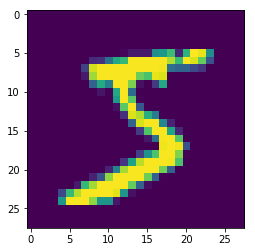

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(10, (1, 1), activation='relu')) #12
model.add(BatchNormalization())

model.add(Convolution2D(32, (3, 3), activation='relu')) # 10
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) #8
model.add(BatchNormalization())

model.add(Convolution2D(32, (3, 3), activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu')) # 6
model.add(BatchNormalization())

model.add(Convolution2D(10, 6 ))


model.add(Flatten())

model.add(Activation('softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 10)        170       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.2824 - acc: 0.9122 - val_loss: 0.0587 - val_acc: 0.9816
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0642 - acc: 0.9802 - val_loss: 0.0488 - val_acc: 0.9843
Epoch 3/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0472 - acc: 0.9850 - val_loss: 0.0336 - val_acc: 0.9896
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0402 - acc: 0.9875 - val_loss: 0.0319 - val_acc: 0.9886
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0330 - acc: 0.9892 - val_loss: 0.0289 - val_acc: 0.9912
Epoch 6/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0294 - acc: 0.9912 - val_loss: 0.0284 - val_acc: 0.9905
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0279 - acc: 0.9911 - val_loss: 0.0311 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print(score)

[0.025614755129325567, 0.9923]
